<a href="https://colab.research.google.com/github/RajeevPrakashAD1/ai_ml/blob/master/cyberBully.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loadinng


In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyberbully/cyberbullying_tweets.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [2]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

# Data preprocessing


In [3]:
df["tweet_text"].isnull().values.any()
df["cyberbullying_type"].isnull().values.any()

False

In [4]:
messages = df["tweet_text"].copy()

print(messages)

0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 47692, dtype: object


In [5]:

yy = df["cyberbullying_type"].copy()


for i in range(len(yy)):
    #print(yy[i])
  
    if yy[i] == "not_cyberbullying":
      #nc += 1
      yy[i] = 0
    else:
      #c += 1
      yy[i] = 1
    #print(yy[i])






0        not_cyberbullying
1        not_cyberbullying
2        not_cyberbullying
3        not_cyberbullying
4        not_cyberbullying
               ...        
47687            ethnicity
47688            ethnicity
47689            ethnicity
47690            ethnicity
47691            ethnicity
Name: cyberbullying_type, Length: 47692, dtype: object
not_cyberbullying


In [6]:
import nltk
import re
from nltk.corpus import stopwords


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
processed_sentences = []
for i in range(0, len(messages)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    processed_sentences.append(review)



In [37]:
print(processed_sentences[0])
print(processed_sentences[1])
print(processed_sentences[2])
print(processed_sentences[3])

word katandandr food crapilici mkr
aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc
xochitlsuckkk classi whore red velvet cupcak
jason gio meh p thank head concern anoth angri dude twitter


# model creation

In [10]:
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [11]:
### Vocabulary size
voc_size=5000

In [12]:
onehot_repr=[one_hot(words,voc_size)for words in processed_sentences] 
onehot_repr[0]

[5988, 4709, 7760, 7089, 8084]

In [39]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 7760 7089 8084]
 [   0    0    0 ... 3099 6996 9352]
 [   0    0    0 ... 8055 9508 6402]
 ...
 [   0    0    0 ... 5086   50 9331]
 [   0    0    0 ... 9331 5379 1536]
 [   0    0    0 ... 1536 8153 5688]]


In [40]:
## Creating model
embedding_vector_features=20
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 20)            200000    
                                                                 
 dropout_6 (Dropout)         (None, 20, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               48400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 248,501
Trainable params: 248,501
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
import numpy as np
y = yy.copy().astype('float32')
x_final=np.array(embedded_docs)
y_final=np.array(y)

print(x_final.shape)
print(y_final.shape)

(47692, 20)
(47692,)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.10, random_state=42)

In [43]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=6,size)

Epoch 1/6
1074/1074 [==============================] - 39s 34ms/step - loss: 0.3079 - accuracy: 0.8458 - val_loss: 0.3004 - val_accuracy: 0.8632
Epoch 2/6
1074/1074 [==============================] - 35s 32ms/step - loss: 0.2441 - accuracy: 0.8790 - val_loss: 0.2759 - val_accuracy: 0.8603
Epoch 3/6
1074/1074 [==============================] - 35s 32ms/step - loss: 0.2160 - accuracy: 0.8960 - val_loss: 0.2955 - val_accuracy: 0.8546
Epoch 4/6
1074/1074 [==============================] - 38s 35ms/step - loss: 0.1956 - accuracy: 0.9059 - val_loss: 0.3094 - val_accuracy: 0.8523
Epoch 5/6
1074/1074 [==============================] - 35s 33ms/step - loss: 0.1762 - accuracy: 0.9167 - val_loss: 0.3830 - val_accuracy: 0.8458
Epoch 6/6
1074/1074 [==============================] - 38s 35ms/step - loss: 0.1606 - accuracy: 0.9252 - val_loss: 0.3821 - val_accuracy: 0.8417


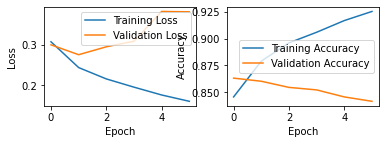

In [44]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
y_pred= model.predict(X_test)

y_pred_classes = (y_pred >= 0.5).astype(int)



150/150 [==============================] - 2s 9ms/step


In [46]:
print(y_pred)
res = 0
for i in y_pred_classes:
  if i==0:
    res += 1
print(res)

[[0.999996  ]
 [0.98344886]
 [0.9999829 ]
 ...
 [0.99999875]
 [0.99999076]
 [0.8549212 ]]
638


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_classes)

array([[ 350,  437],
       [ 288, 3695]])

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.8480083857442348


In [35]:
s = "In"
onehot_s=[one_hot(s,voc_size)]
print(onehot_s) 
sent_length=40
s_embeded=pad_sequences(onehot_s,padding='pre',maxlen=sent_length)
cs = np.array(s_embeded)
y  = model.predict(cs)
#print(cs)
print(y)
#print(embedded_docs)


[[4494]]
1/1 [==============================] - 0s 39ms/step
[[0.9663627]]
